In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
from scipy.integrate import odeint

In [2]:
alpha_pten= 1
delta_xa= 0.1 #paper
beta_xa=10 #https://febs.onlinelibrary.wiley.com/doi/full/10.1111/j.1742-4658.2012.08582.x
k_xa= 1
beta_xi= 0.01
k_xi= 1
delta_xi= 0.1
S=1.2 #signaling source of mTOR (paper)
beta_yi= 0.02 #està bé --> https://febs.onlinelibrary.wiley.com/doi/full/10.1111/j.1742-4658.2012.08582.x
k_yi=1
beta_ya= 0.017762 #està bé --> https://febs.onlinelibrary.wiley.com/doi/full/10.1111/j.1742-4658.2012.08582.x
k_ya= 1
y_total= 0.5

In [3]:
def f(xyz,t):
    xa, xi, y = xyz
    d_xa= (-alpha_pten*xyz[0])-(delta_xa*xyz[0])-((beta_xa*xyz[2]*xyz[0])/(k_xa+xyz[0]))+((beta_xi*xyz[1])/(k_xi+xyz[1]))+S
    d_xi= (alpha_pten*xyz[0])-(delta_xi*xyz[1])+((beta_xi*xyz[2]*xyz[0])/(k_xa+xyz[0]))-((beta_xi*xyz[1])/(k_xi+xyz[1]))
    d_y= -((beta_yi*xyz[0]*xyz[2])/(k_yi+xyz[2]))+((beta_ya*(y_total-xyz[2]))/(k_ya+(y_total-xyz[2])))
    return [d_xa, d_xi, d_y]

Text(0, 0.5, 'cell concentration')

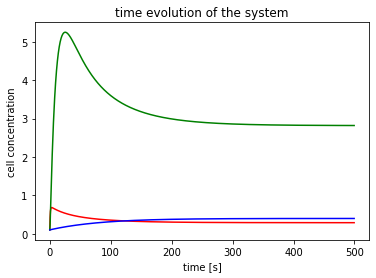

In [4]:
t=np.arange(0,500,0.5)
x0y0z0=[0.1,0.1,0.1]


xyz_out=odeint(f,x0y0z0,t)

plt.figure()
plt.plot(t,xyz_out[:,0],color='r')
plt.plot(t,xyz_out[:,1],color='g')
plt.plot(t,xyz_out[:,2],color='b')

plt.title('time evolution of the system')
#plt.legend('mTOR active','mTOR inactive','TSC')
plt.xlabel('time [s]')
plt.ylabel('cell concentration')

Text(0, 0.5, 'mTOR active concentration')

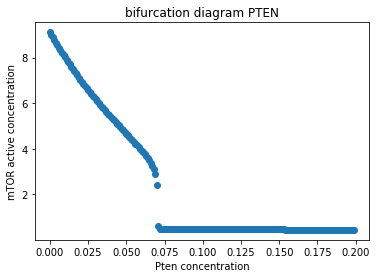

In [5]:
beta_yi=0.02
beta_ya= 0.017762

x0y0z0=[0.1,0.1,0.1]
alpha_max=0.2
dalpha=0.001# 0.05
alpha_pten_vec=np.arange(0,alpha_max,dalpha)
fix_points=np.zeros_like(alpha_pten_vec)
t=np.arange(0,500,0.5)
i=0

for alpha_pten in alpha_pten_vec:
    def f(xyz,t):
        xa, xi, y = xyz
        d_xa= (-alpha_pten*xyz[0])-(delta_xa*xyz[0])-((beta_xa*xyz[2]*xyz[0])/(k_xa+xyz[0]))+((beta_xi*xyz[1])/(k_xi+xyz[1]))+S
        d_xi= (alpha_pten*xyz[0])-(delta_xi*xyz[1])+((beta_xi*xyz[2]*xyz[0])/(k_xa+xyz[0]))-((beta_xi*xyz[1])/(k_xi+xyz[1]))
        d_y= -((beta_yi*xyz[0]*xyz[2])/(k_yi+xyz[2]))+((beta_ya*(y_total-xyz[2]))/(k_ya+(y_total-xyz[2])))
        return [d_xa, d_xi, d_y]

    
    xyz_out=odeint(f,x0y0z0,t)
    fix_points[i]=xyz_out[-1,0]
    x0y0z0=[xyz_out[-1,0],xyz_out[-1,1],xyz_out[-1,2]]
    i=i+1

plt.figure()
plt.plot(alpha_pten_vec,fix_points,'o')

plt.title('bifurcation diagram PTEN')
#plt.legend('mTOR active','mTOR inactive','TSC')
plt.xlabel('Pten concentration')
plt.ylabel('mTOR active concentration')


[0.199 0.198 0.197 0.196 0.195 0.194 0.193 0.192 0.191 0.19  0.189 0.188
 0.187 0.186 0.185 0.184 0.183 0.182 0.181 0.18  0.179 0.178 0.177 0.176
 0.175 0.174 0.173 0.172 0.171 0.17  0.169 0.168 0.167 0.166 0.165 0.164
 0.163 0.162 0.161 0.16  0.159 0.158 0.157 0.156 0.155 0.154 0.153 0.152
 0.151 0.15  0.149 0.148 0.147 0.146 0.145 0.144 0.143 0.142 0.141 0.14
 0.139 0.138 0.137 0.136 0.135 0.134 0.133 0.132 0.131 0.13  0.129 0.128
 0.127 0.126 0.125 0.124 0.123 0.122 0.121 0.12  0.119 0.118 0.117 0.116
 0.115 0.114 0.113 0.112 0.111 0.11  0.109 0.108 0.107 0.106 0.105 0.104
 0.103 0.102 0.101 0.1   0.099 0.098 0.097 0.096 0.095 0.094 0.093 0.092
 0.091 0.09  0.089 0.088 0.087 0.086 0.085 0.084 0.083 0.082 0.081 0.08
 0.079 0.078 0.077 0.076 0.075 0.074 0.073 0.072 0.071 0.07  0.069 0.068
 0.067 0.066 0.065 0.064 0.063 0.062 0.061 0.06  0.059 0.058 0.057 0.056
 0.055 0.054 0.053 0.052 0.051 0.05  0.049 0.048 0.047 0.046 0.045 0.044
 0.043 0.042 0.041 0.04  0.039 0.038 0.037 0.036 0.03

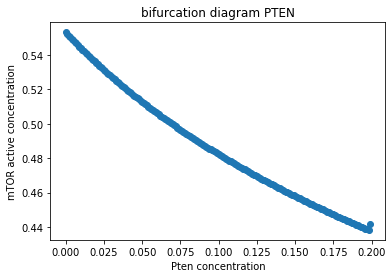

In [12]:
beta_yi=0.02
beta_ya= 0.017762

x0y0z0=[0.1,0.1,0.1]
alpha_max=0.2
dalpha=0.001# 0.05
alpha_pten_vec=np.arange(0,alpha_max,dalpha)
fix_points=np.zeros_like(alpha_pten_vec)
alpha_pten_inv=alpha_pten_vec[::-1]
t=np.arange(0,500,0.5)
i=0

for alpha_pten in alpha_pten_inv:
    def f(xyz,t):
        xa, xi, y = xyz
        d_xa= (-alpha_pten*xyz[0])-(delta_xa*xyz[0])-((beta_xa*xyz[2]*xyz[0])/(k_xa+xyz[0]))+((beta_xi*xyz[1])/(k_xi+xyz[1]))+S
        d_xi= (alpha_pten*xyz[0])-(delta_xi*xyz[1])+((beta_xi*xyz[2]*xyz[0])/(k_xa+xyz[0]))-((beta_xi*xyz[1])/(k_xi+xyz[1]))
        d_y= -((beta_yi*xyz[0]*xyz[2])/(k_yi+xyz[2]))+((beta_ya*(y_total-xyz[2]))/(k_ya+(y_total-xyz[2])))
        return [d_xa, d_xi, d_y]

    
    xyz_out=odeint(f,x0y0z0,t)
    fix_points[i]=xyz_out[-1,0]
    x0y0z0=[xyz_out[-1,0],xyz_out[-1,1],xyz_out[-1,2]]
    i=i+1

plt.figure()
plt.plot(alpha_pten_inv,fix_points,'o')

plt.title('bifurcation diagram PTEN')
#plt.legend('mTOR active','mTOR inactive','TSC')
plt.xlabel('Pten concentration')
plt.ylabel('mTOR active concentration')

print(alpha_pten_inv)

Text(0, 0.5, 'mTOR active concentration')

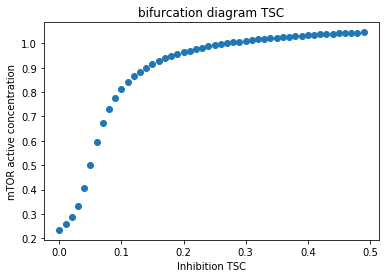

In [7]:
alpha_pten=1
beta_ya= 0.017762

x0y0z0=[0.1,0.1,0.1]
betayi_max=0.5
dbetayi=0.01
fix_points=np.zeros(50)
betayi_vec=np.arange(0,betayi_max,dbetayi)
t=np.arange(0,500,0.5)
i=0

for beta_yi in betayi_vec:
    def f(xyz,t):
        xa, xi, y = xyz
        d_xa= (-alpha_pten*xyz[0])-(delta_xa*xyz[0])-((beta_xa*xyz[2]*xyz[0])/(k_xa+xyz[0]))+((beta_xi*xyz[1])/(k_xi+xyz[1]))+S
        d_xi= (alpha_pten*xyz[0])-(delta_xi*xyz[1])+((beta_xi*xyz[2]*xyz[0])/(k_xa+xyz[0]))-((beta_xi*xyz[1])/(k_xi+xyz[1]))
        d_y= -((beta_yi*xyz[0]*xyz[2])/(k_yi+xyz[2]))+((beta_ya*(y_total-xyz[2]))/(k_ya+(y_total-xyz[2])))
        return [d_xa, d_xi, d_y]

    
    xyz_out=odeint(f,x0y0z0,t)
    fix_points[i]=xyz_out[-1,0]
    x0y0z0=[xyz_out[-1,0],xyz_out[-1,1],xyz_out[-1,2]]
    i=i+1

plt.figure()
plt.plot(betayi_vec,fix_points,'o')

plt.title('bifurcation diagram TSC')
#plt.legend('mTOR active','mTOR inactive','TSC')
plt.xlabel('Inhibition TSC')
plt.ylabel('mTOR active concentration')



Text(0, 0.5, 'mTOR active concentration')

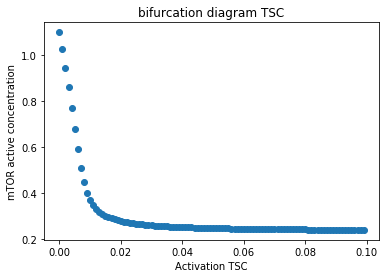

In [8]:
alpha_pten=1
beta_yi=0.02

x0y0z0=[0.01,0.01,0.01]
betaya_max=0.1
dbetaya=0.001
betaya_vec=np.arange(0,betaya_max,dbetaya)
fix_points=np.zeros_like(betaya_vec)
t=np.arange(0,500,0.5)
i=0

for beta_ya in betaya_vec:
    def f(xyz,t):
        xa, xi, y = xyz
        d_xa= (-alpha_pten*xyz[0])-(delta_xa*xyz[0])-((beta_xa*xyz[2]*xyz[0])/(k_xa+xyz[0]))+((beta_xi*xyz[1])/(k_xi+xyz[1]))+S
        d_xi= (alpha_pten*xyz[0])-(delta_xi*xyz[1])+((beta_xi*xyz[2]*xyz[0])/(k_xa+xyz[0]))-((beta_xi*xyz[1])/(k_xi+xyz[1]))
        d_y= -((beta_yi*xyz[0]*xyz[2])/(k_yi+xyz[2]))+((beta_ya*(y_total-xyz[2]))/(k_ya+(y_total-xyz[2])))
        return [d_xa, d_xi, d_y]

    
    xyz_out=odeint(f,x0y0z0,t)
    fix_points[i]=xyz_out[-1,0]
    x0y0z0=[xyz_out[-1,0],xyz_out[-1,1],xyz_out[-1,2]]
    i=i+1

plt.figure()
plt.plot(betaya_vec,fix_points,'o')

plt.title('bifurcation diagram TSC')
#plt.legend('mTOR active','mTOR inactive','TSC')
plt.xlabel('Activation TSC')
plt.ylabel('mTOR active concentration')